# Approximate Pi with sampling

In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
n = 10000
square_min = -1
square_max = 1
xy = np.random.uniform(square_min, square_max, size=(2, n))

In [45]:
in_circle = [e[0]**2 + e[1]**2 < 1 for e in xy.T]

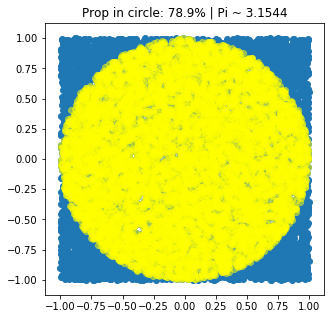

In [46]:
plt.figure(figsize=(5, 5))
plt.scatter(x=xy[0], y=xy[1]);
plt.scatter(x=xy[0][in_circle], y=xy[1][in_circle], color='yellow', alpha=0.5);
in_ratio = sum(in_circle)/n
square_area = (square_max - square_min) ** 2
pi_approx = square_area * in_ratio
plt.title(f'Prop in circle: {100.*in_ratio:0.1f}% | Pi ~ {pi_approx:0.4f}');

In [ ]:
#circumference = 2 * pi * r
#area = pi * r ** 2